# Salt segmentation in seismic data with texture attributes

Following the method described in [Hegazy et al.](http://pwp.gatech.edu/ece-msl/wp-content/uploads/sites/562/2017/01/Hegazy-SEG-2014.pdf), detecting and segmenting salt in seismic images. 

Their approach improved on earlier work by [Berthelot et al.](http://www.segj.org/is/9th/program/abstract/047_Berthelot.html) using grey-level colocation matrices and other attributes to segment regions containing salt. I'll look at the GLCM method first.

In [1]:
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

import numpy as np

Seismic images from the TGS Kaggle Competition.

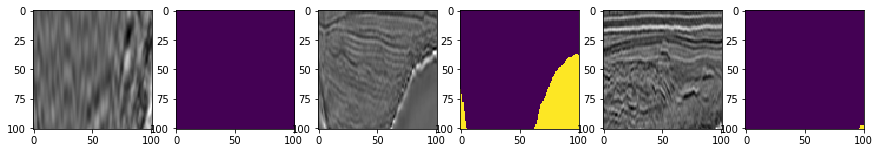

In [2]:
ids= ['1f1cc6b3a4','5b7c160d0d', '6c40978ddf']
plt.figure(figsize=(20,10))
for j, img_name in enumerate(ids):
    q = j+1
    img = Image.open('F:/Projects/Seismic_salt_identification/train/images/' + img_name + '.png')
    img_mask = Image.open('F:/Projects/Seismic_salt_identification/train/masks/' + img_name + '.png')
    
    plt.subplot(1,2*(1+len(ids)),q*2-1)
    plt.imshow(img)
    plt.subplot(1,2*(1+len(ids)),q*2)
    plt.imshow(img_mask)
plt.show()

These images look different. It is important to see that the middle image `5b7c160d0d` has a salt region (note the yellow region in the mask), and the salt region looks very different than the non-salt region.

In [3]:
from skimage import data, io, filters

img_5b7c = Image.open('F:/Projects/Seismic_salt_identification/train/images/5b7c160d0d.png')
img_mask = Image.open('F:/Projects/Seismic_salt_identification/train/masks/5b7c160d0d.png')

In [4]:
img_5b7c.size

(101, 101)

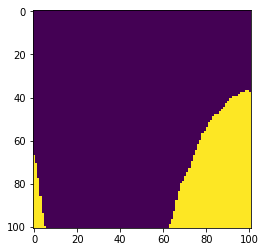

In [5]:
plt.imshow(img_mask)

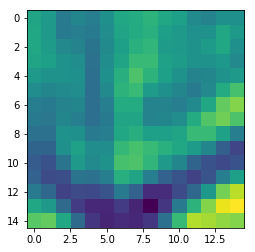

In [6]:
from skimage.io import imread

from skimage.color import rgb2gray


import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import data


img_5b7c = imread('F:/Projects/Seismic_salt_identification/train/images/5b7c160d0d.png')


img_arr = np.array(rgb2gray(img_5b7c))
plt.imshow((256*img_arr[0:15, 0:15]).astype(int))

patch = (256*img_arr[0:15, 0:15]).astype(int)

glcm = greycomatrix(patch, [2], [0], 256, symmetric=True, normed=True)
nonsalt_glcm = (greycoprops(glcm, 'dissimilarity')[0][0], greycoprops(glcm, 'correlation')[0][0])

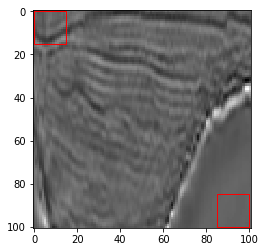

In [7]:
import matplotlib.patches as patches

rect = patches.Rectangle((0,0), 15, 15, linewidth=1, edgecolor = 'r', facecolor='none')
rect2 = patches.Rectangle((85,85), 15, 15, linewidth=1, edgecolor = 'r', facecolor='none')

fig, ax = plt.subplots(1)
ax.imshow(img_5b7c)

for patch in [rect, rect2]:
    ax.add_patch(patch)
plt.show()

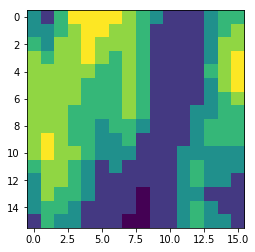

In [8]:
patch2 = (256*img_arr[85:101, 85:101]).astype(int)
plt.imshow(patch2)

In [9]:
glcm = greycomatrix(patch2, [2], [0], 256, symmetric=True, normed=True)
salt_glcm = (greycoprops(glcm, 'dissimilarity')[0][0], greycoprops(glcm, 'correlation')[0][0])

(1.3384615384615386, 0.413077853222956)

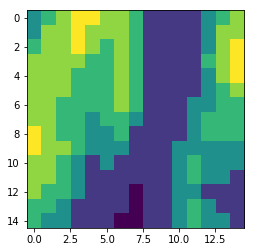

In [10]:
plt.imshow((256*img_arr[86:101,86:101]).astype(int))

patch = (256*img_arr[86:101, 86:101]).astype(int)

glcm = greycomatrix(patch, [2], [0], 256, symmetric=True, normed=True)
(greycoprops(glcm, 'dissimilarity')[0][0], greycoprops(glcm, 'correlation')[0][0])

This plot, of dissimilarity vs correlation for pixels in salt region and for pixels in non-salt regions, shows that it is possible in this specific instance to distinguish between the two classes from these texture attributes.

(0, 14)

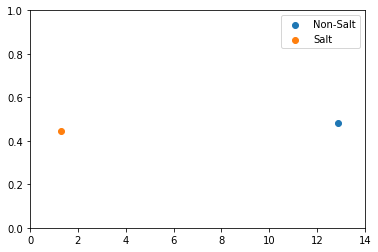

In [11]:
x, y = zip(*[nonsalt_glcm, salt_glcm])

for label, point in zip(["Non-Salt", "Salt"],[nonsalt_glcm, salt_glcm]):
    plt.scatter(*point, label=label)
plt.legend()
plt.ylim(0,1)
plt.xlim(0,14)

In [12]:
import numpy as np

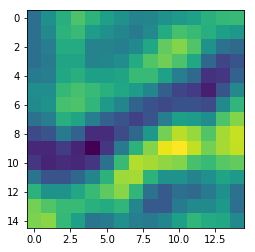

In [14]:
import random

def random_array_sample(arr, size):
    side = min(arr.shape)
    ulc = random.randint(0, side-size)
    return arr[ulc:ulc+size, ulc:ulc+size]

img_sample = random_array_sample(img_arr, 15)



plt.imshow((256*img_sample).astype(int))